In [90]:
import os
import platform
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import seaborn as sns
import numpy as np
from sklearn.metrics import root_mean_squared_error
from skimage.metrics import structural_similarity as ssim
from src.datahandler import DataHandler

In [91]:
def calculate_similarity(df1, df2):
    """Calculates the MSE between two datasets representing game boards."""
    mse = root_mean_squared_error(df1.values.flatten(), df2.values.flatten())
    return mse

In [92]:
def compare_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    similarities = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            similarity = calculate_similarity(df, last_df)
            similarities[label] = similarity
            print(f"MSE between {label} and {last_label}: {similarity:.4f}")
    
    return similarities

In [93]:
def plot_game_board(board_size, game_row, ax, dataset_name):
    board = game_row.drop('winner').values.reshape(board_size, board_size)
    sns.heatmap(board, annot=True, cmap='coolwarm', cbar=False, linewidths=.5, ax=ax)
    ax.set_title(f"{dataset_name}: (Winner: {game_row['winner']})")

In [94]:
def plot_random_game_boards(datasets, num_rows=10):
    for _ in range(num_rows):
        fig, axes = plt.subplots(1, len(datasets), figsize=(18, 4))
        
        # Iterate through datasets and plot each one
        for ax, (label, df) in zip(axes, datasets.items()):
            random_idx = np.random.randint(0, len(df))
            plot_game_board(15, df.iloc[random_idx], ax, label)
        
        # Adjust layout and show
        plt.tight_layout()
        plt.show()

In [ ]:
def plot_game_board_rhombus(board_size, game_row, ax, dataset_name):
    # Prepare the game board matrix
    board = game_row.drop('winner').values.reshape(board_size, board_size)
    
    # Plot heatmap
    sns.heatmap(
        board, 
        annot=False,  # Disable numbers in the cells
        cmap='coolwarm', 
        cbar=False, 
        linewidths=.5, 
        ax=ax, 
        square=True  # Start with square cells
    )
    
    # Apply skew transformation to create rhombus effect
    trans = Affine2D().skew_deg(30, 0) + ax.transData  # Skew horizontally by 30 degrees
    for artist in ax.get_children():  # Apply to all children (e.g., heatmap cells)
        artist.set_transform(trans)
    
     # Set limits to ensure the board is fully visible
    ax.set_xlim(-0.5, board_size + 8.5)
    ax.set_ylim(board_size, 1.0)  # Reverse y-axis to align correctly
    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"    {dataset_name}", fontsize=16, loc='left')




In [ ]:
def plot_random_game_boards_rhombus(datasets, num_rows=10):
    for i in range(num_rows):
        fig_width_per_subplot = 4  # Define width per subplot
        fig_height = 6  # Define height of each subplot
        total_fig_width = fig_width_per_subplot * len(datasets)  # Total width of the figure
        
        # Create the figure with explicit width and height
        fig, axes = plt.subplots(1, len(datasets), figsize=(total_fig_width, fig_height))
        
        # Iterate through datasets and plot each one
        for ax, (label, df) in zip(axes, datasets.items()):
            random_idx = np.random.randint(0, len(df))
            plot_game_board_rhombus(15, df.iloc[random_idx], ax, label)
        
        # Adjust layout and show
        plt.tight_layout()
        plt.savefig(f"results/dataset_theshold_{i}")
        plt.show()

In [106]:
def get_machine_info():
    machine_name = platform.node()  
    user = os.getenv("USER") or os.getenv("USERNAME") 
    os_name = platform.system()  # Get os
    print(f"Machine: {machine_name}")
    print(f"OS: {os_name}")
    print(f"User: {user}")
    
    # Print machine info
    return machine_name, os_name, user

In [107]:
windows_drive = Path("/mnt/f/TsetlinModels")

In [98]:
machine_name, os_name, user = get_machine_info()

if machine_name == "Corsair" and os_name == "Linux" and user == "jon":
    os.makedirs(windows_drive / "data", exist_ok=True)
    os.makedirs(windows_drive / "models", exist_ok=True)
    os.makedirs(windows_drive / "graphs", exist_ok=True)

    paths = {
        "data": windows_drive / "data",
        "models": windows_drive / "models",
        "graphs": windows_drive / "graphs",
    }
else:
    os.makedirs("data", exist_ok=True)
    os.makedirs("models", exist_ok=True)
    os.makedirs("graphs", exist_ok=True)

    paths = {
        "data": Path("data"),
        "models": Path("models"),
        "graphs": Path("graphs"),
    }

Machine: Corsair
OS: Linux
User: jon


In [99]:
file_paths = [
    
    ('15x15_2000_10_0', 'Threshold 10%'),
    ('15x15_2000_20_0', 'Threshold 20%'),
    ('15x15_2000_30_0', 'Threshold 30%'),
    ('15x15_2000_40_0', 'Threshold 40%'),
    ('15x15_2000_50_0', 'Threshold 50%'),
    
]

file_paths_old = [
    ('data/old/15x15_200000_coord_034711_0.csv', 'NO Threshold'),
    ('data/old/hex_games_15.csv', 'Threshold N30'),
]

In [100]:
datasets_old = {name: pd.read_csv(path) for path, name in file_paths_old}

In [101]:
datasets = {name: DataHandler(paths=paths, files={'data': path}, dataloader='pd', n_samples=1000).data for path, name in file_paths}

In [102]:
datasets = {name: df.drop('starting_player', axis=1) for name, df in datasets.items()}
datasets.update(datasets_old)

In [103]:
datasets['Threshold N30']

,cell0_0,cell0_1,cell0_2,cell0_3,cell0_4,cell0_5,cell0_6,cell0_7,cell0_8,cell0_9,...,cell14_6,cell14_7,cell14_8,cell14_9,cell14_10,cell14_11,cell14_12,cell14_13,cell14_14,winner
0,-1,0,1,1,1,-1,-1,-1,-1,0,...,-1,1,1,1,-1,0,0,-1,-1,0
1,-1,0,-1,0,1,0,-1,-1,1,0,...,-1,-1,-1,0,-1,-1,0,1,1,0
2,1,-1,1,-1,-1,1,-1,-1,-1,1,...,0,1,-1,0,0,1,0,1,-1,1
3,1,-1,1,0,-1,1,1,1,1,1,...,-1,-1,1,0,-1,-1,1,0,1,1
4,-1,0,1,0,0,-1,1,1,1,-1,...,1,-1,0,0,1,-1,1,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676233,-1,0,-1,1,-1,1,0,1,-1,-1,...,1,0,0,-1,1,-1,-1,0,1,0
676234,1,1,1,-1,0,1,0,0,1,-1,...,-1,-1,1,0,1,0,0,0,1,1
676235,0,-1,1,1,-1,-1,-1,-1,0,1,...,0,1,1,0,0,1,0,0,-1,0
676236,1,-1,-1,-1,-1,0,1,-1,1,-1,...,1,-1,1,1,1,-1,1,1,-1,0


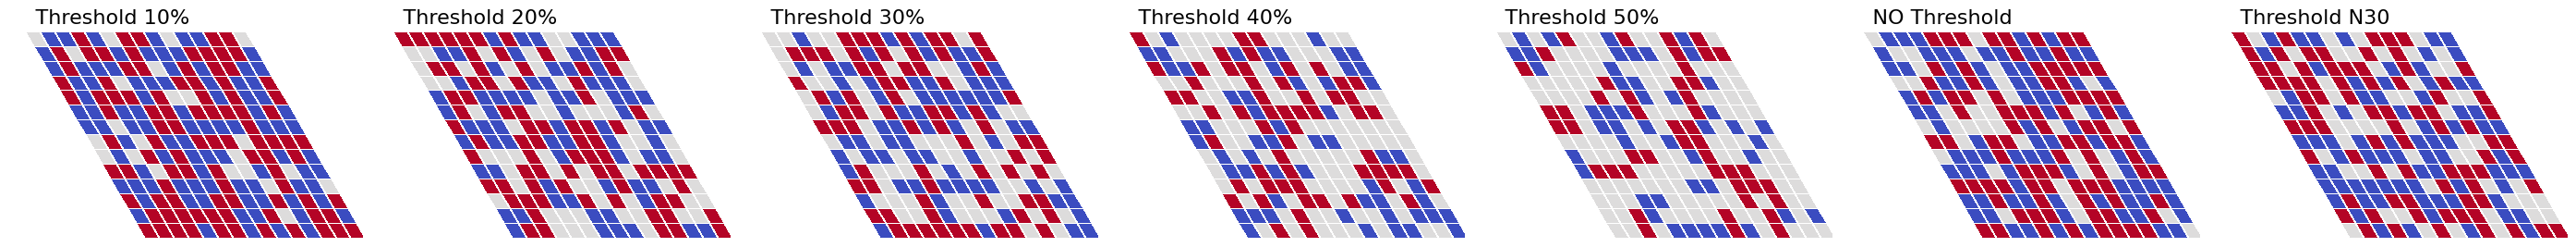

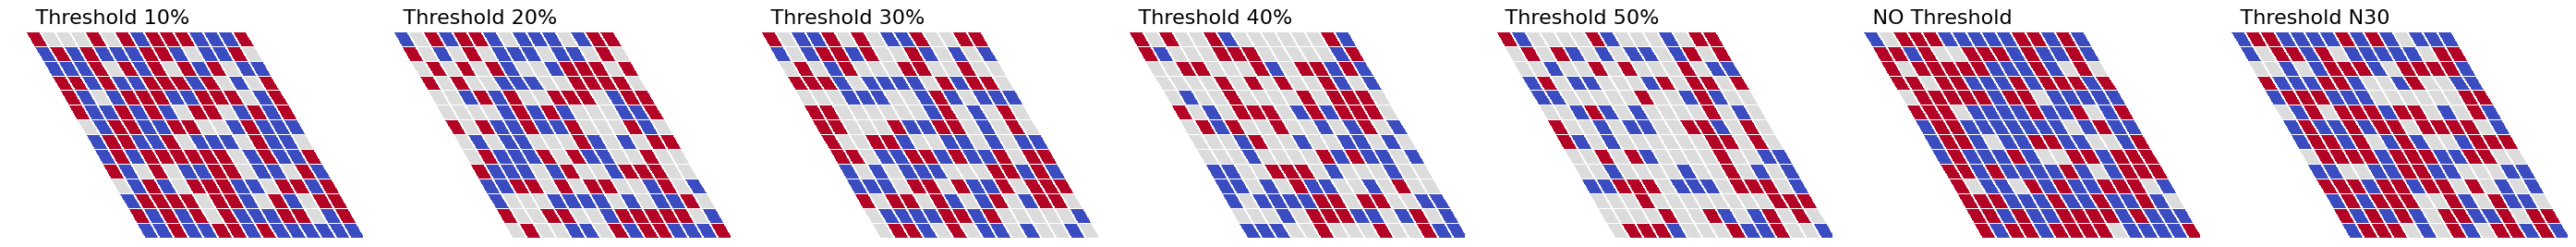

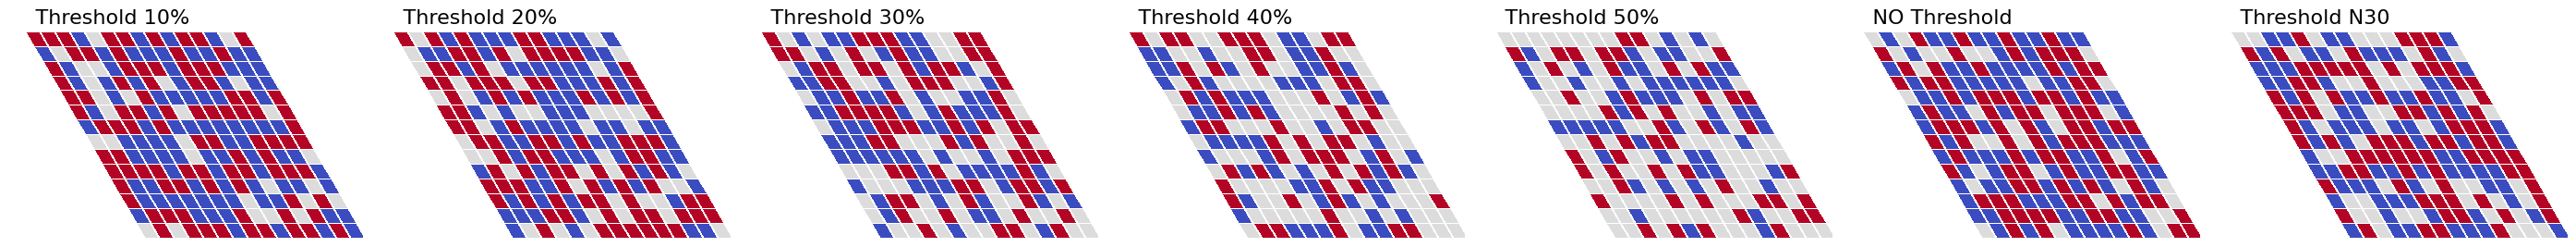

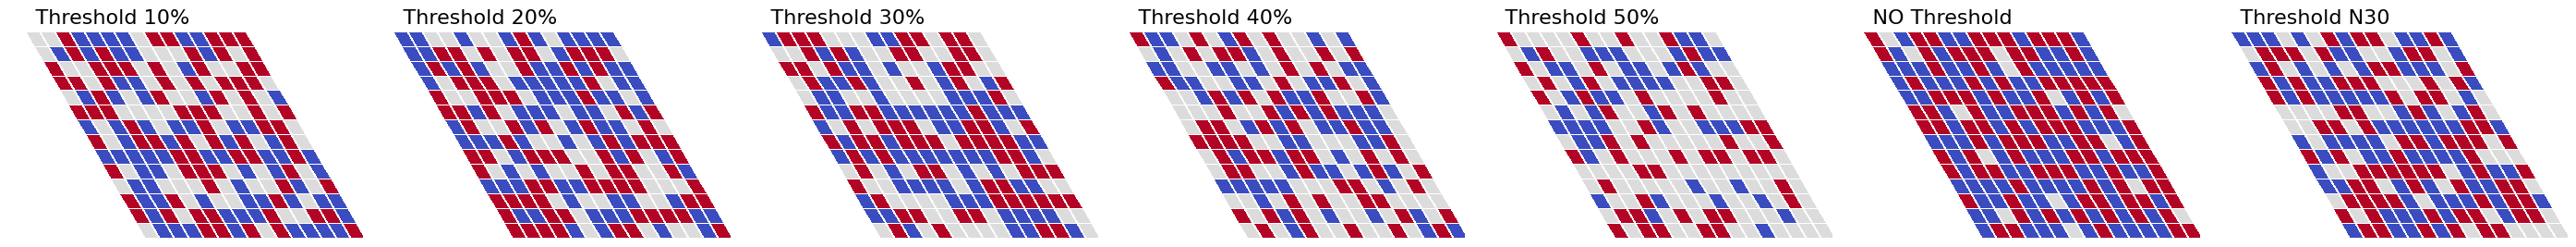

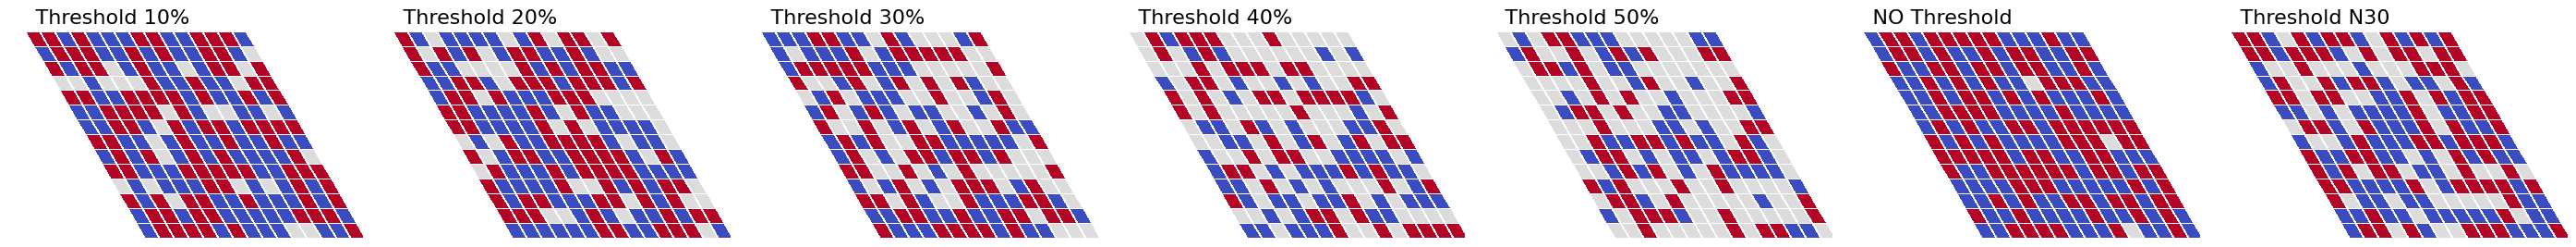

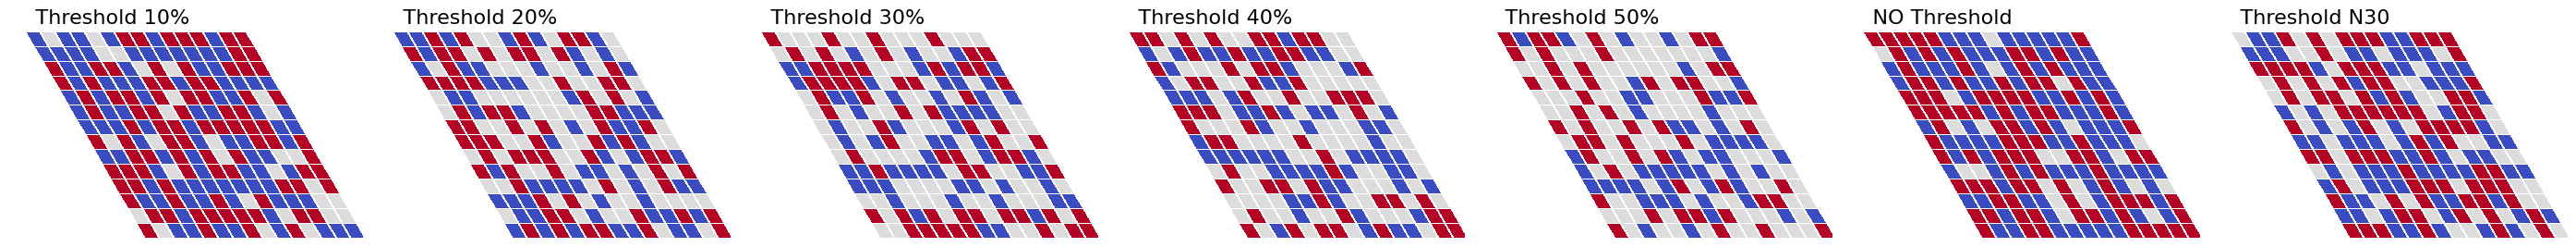

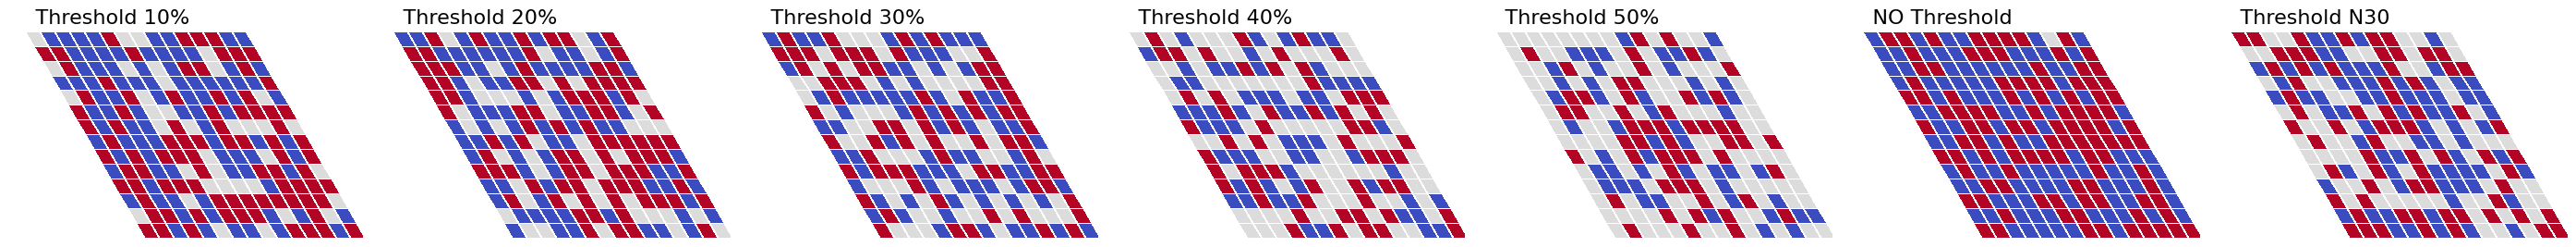

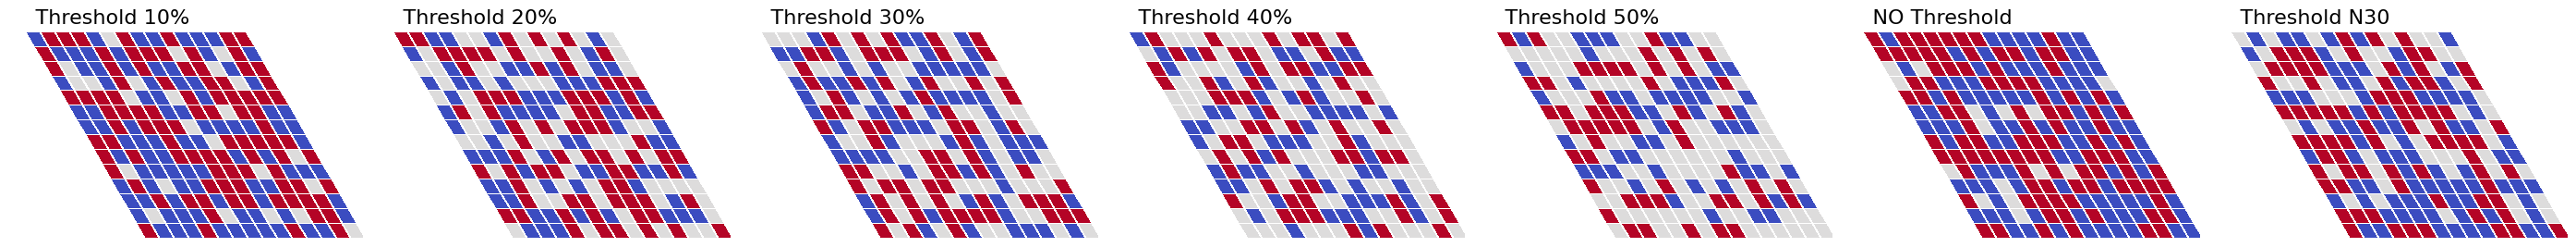

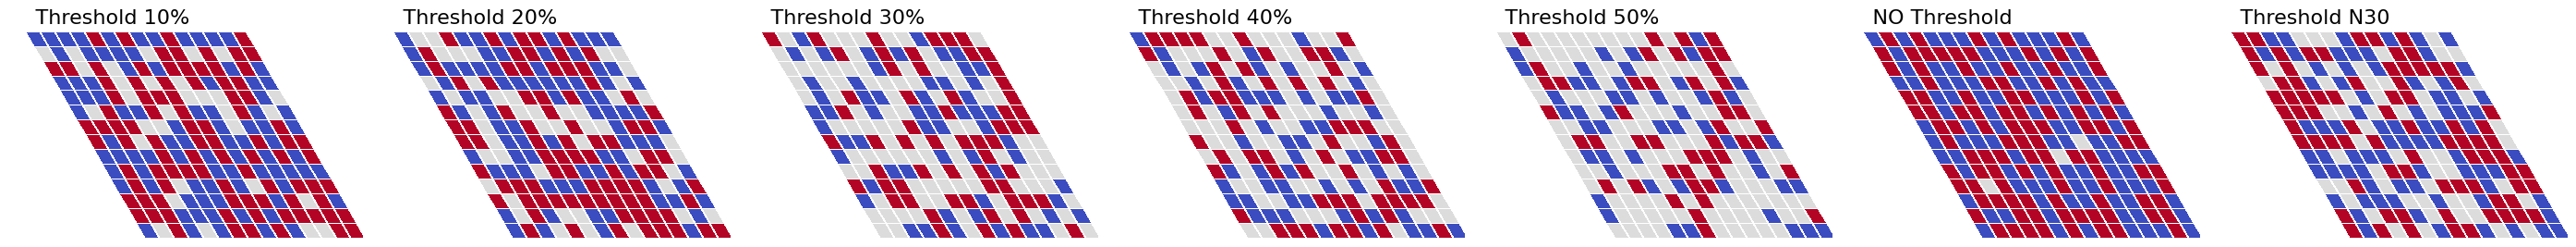

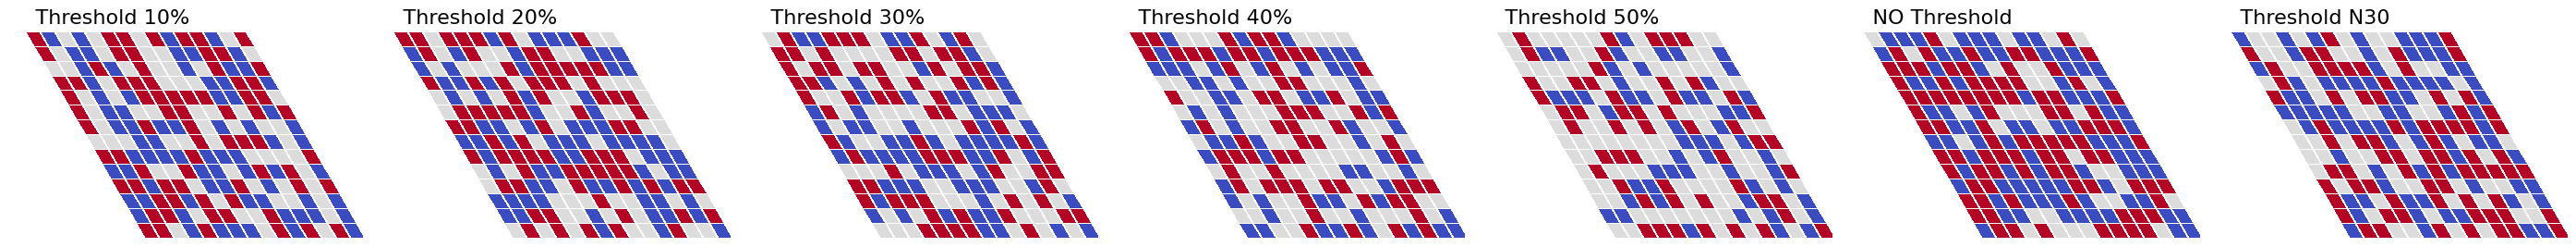

In [165]:
plot_random_game_boards_rhombus(datasets)

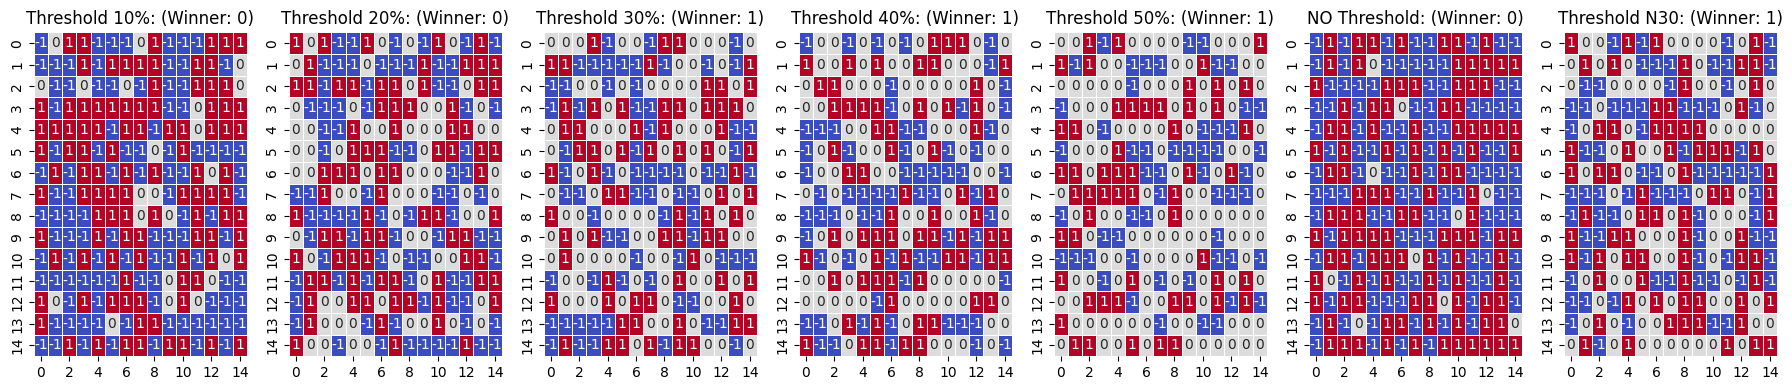

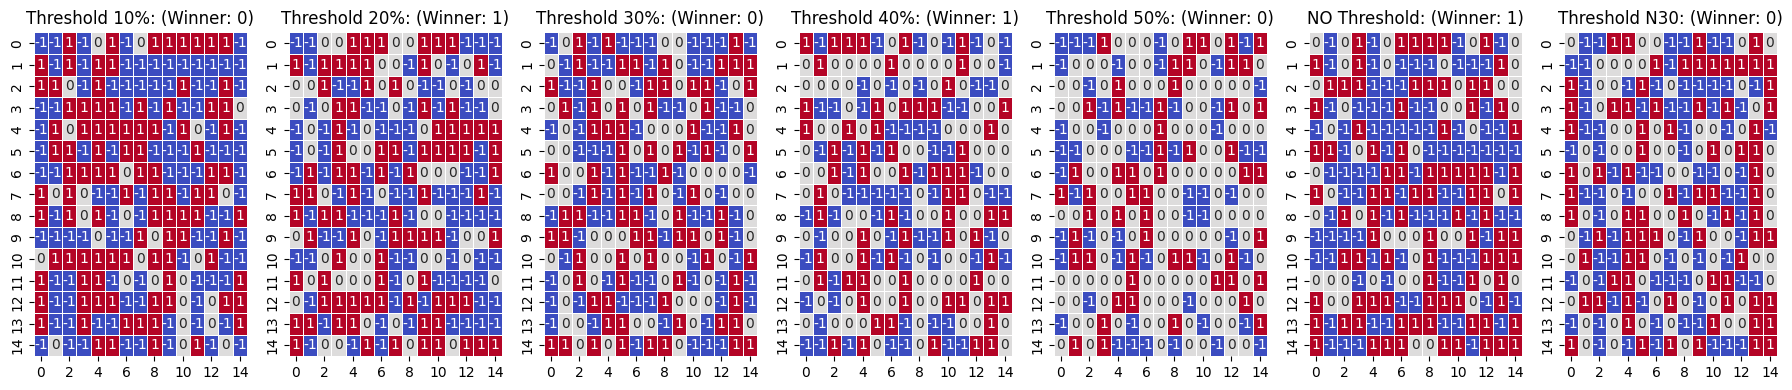

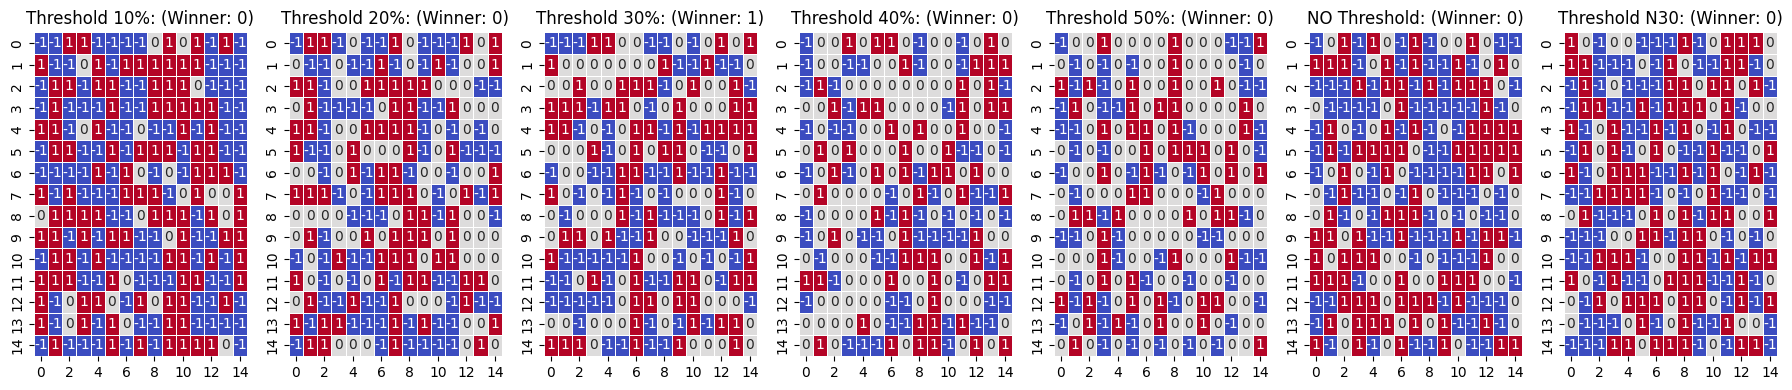

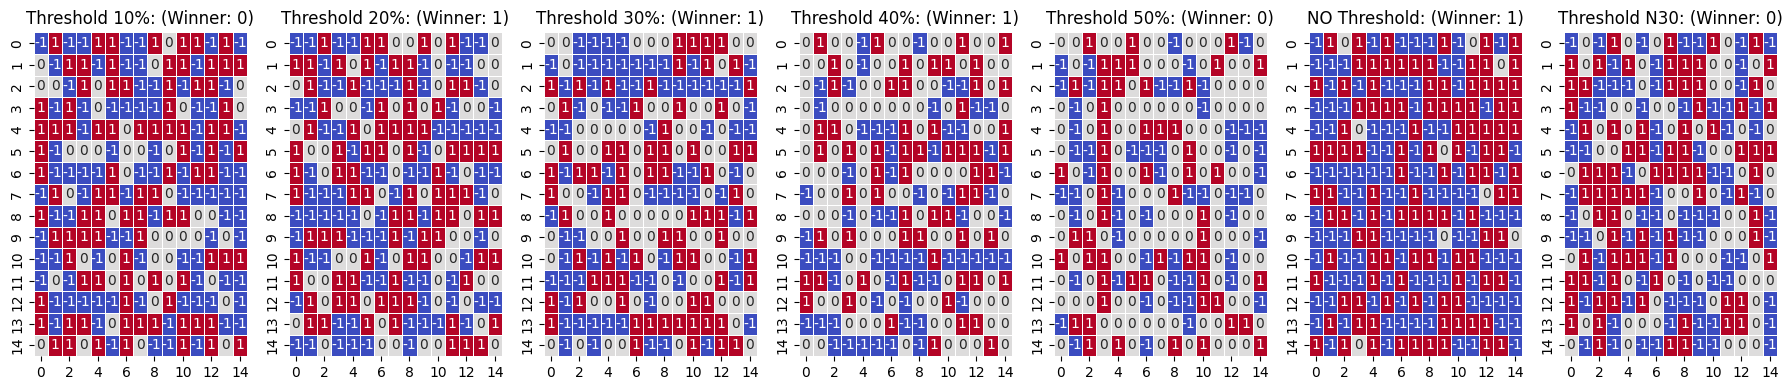

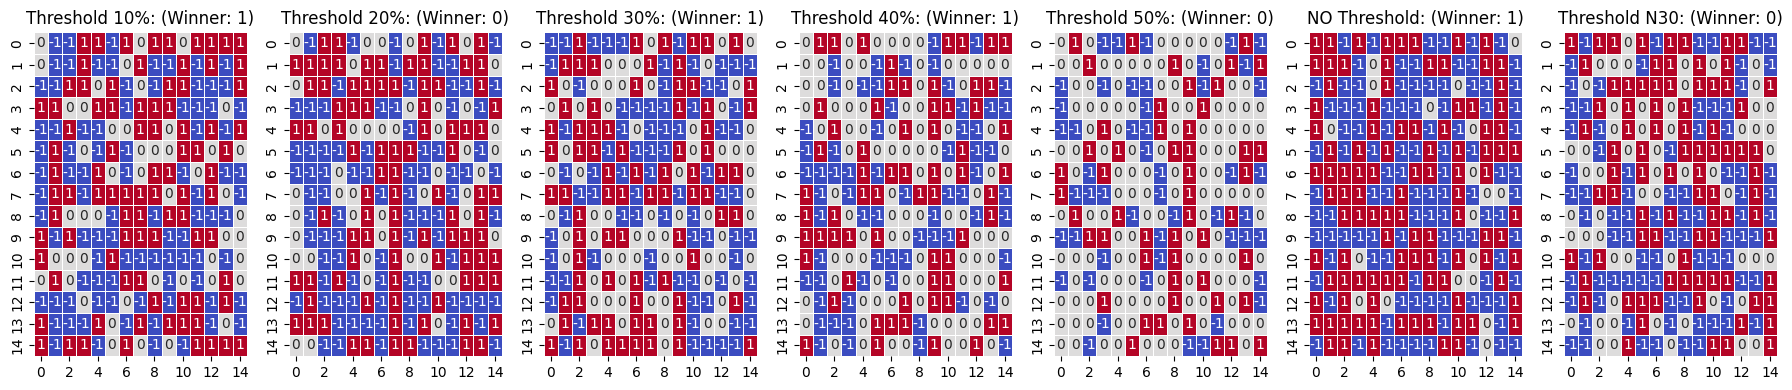

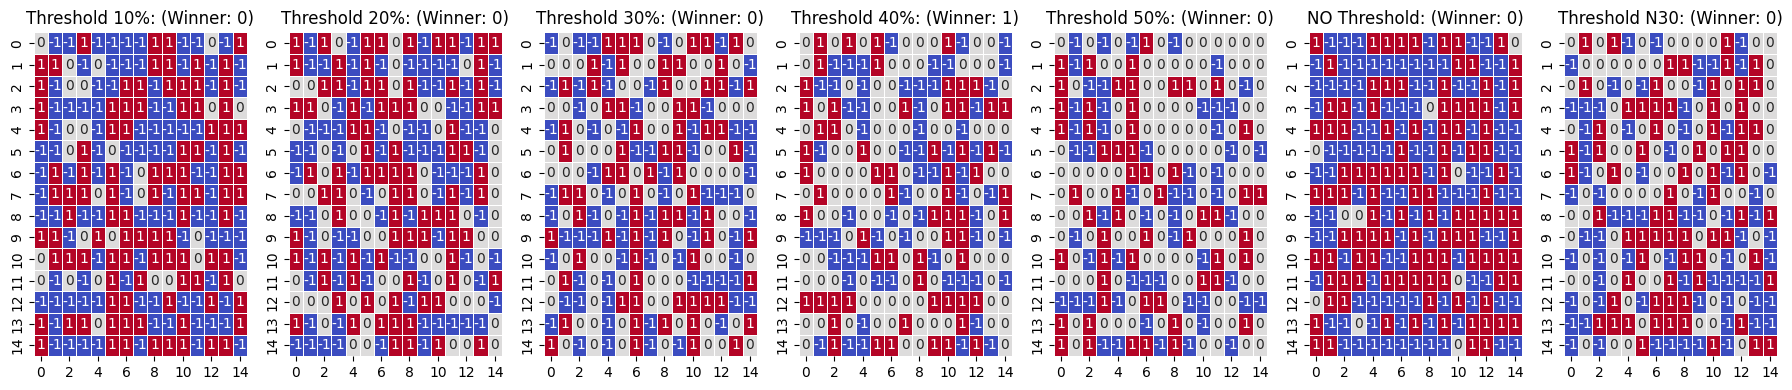

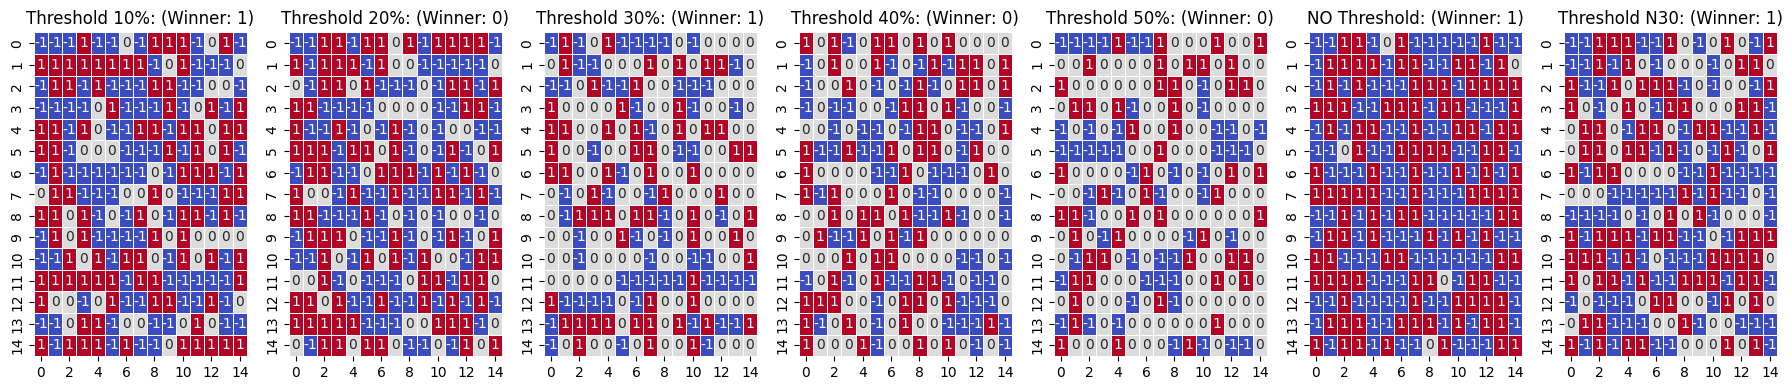

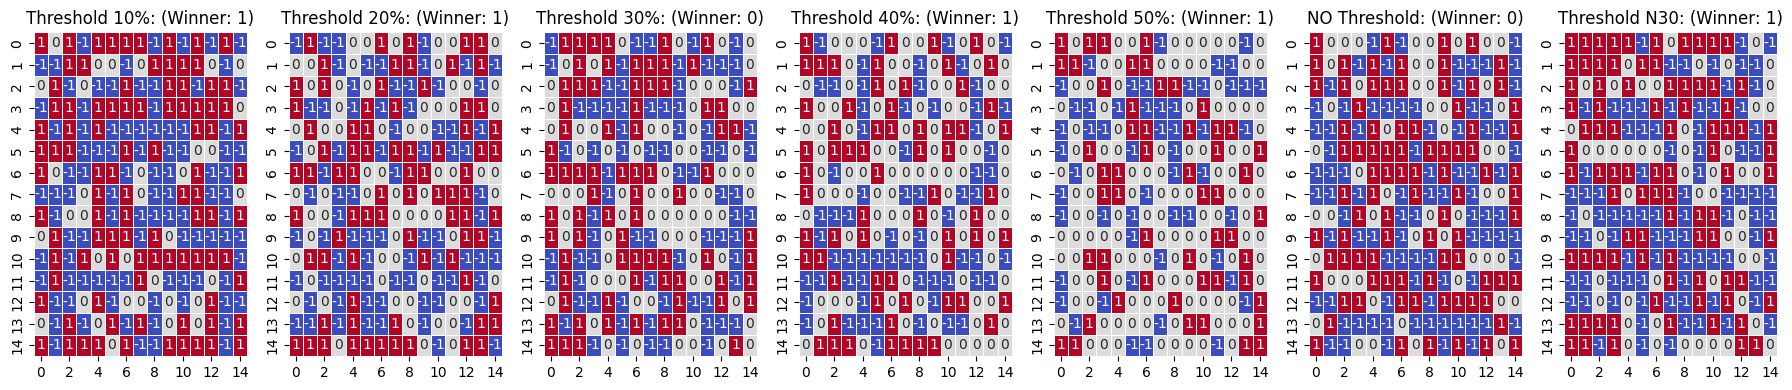

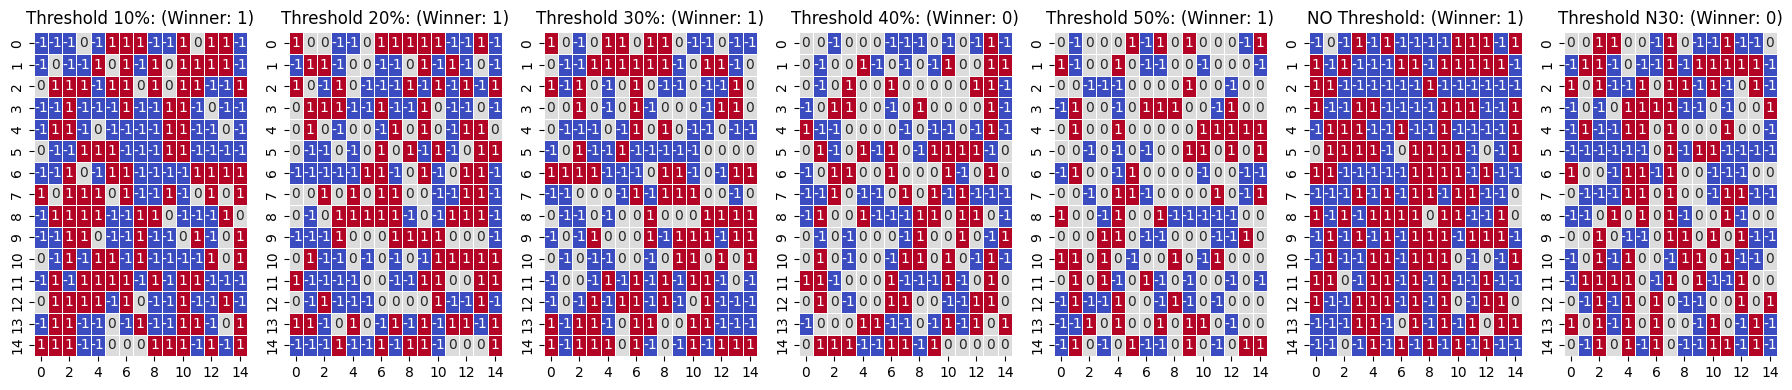

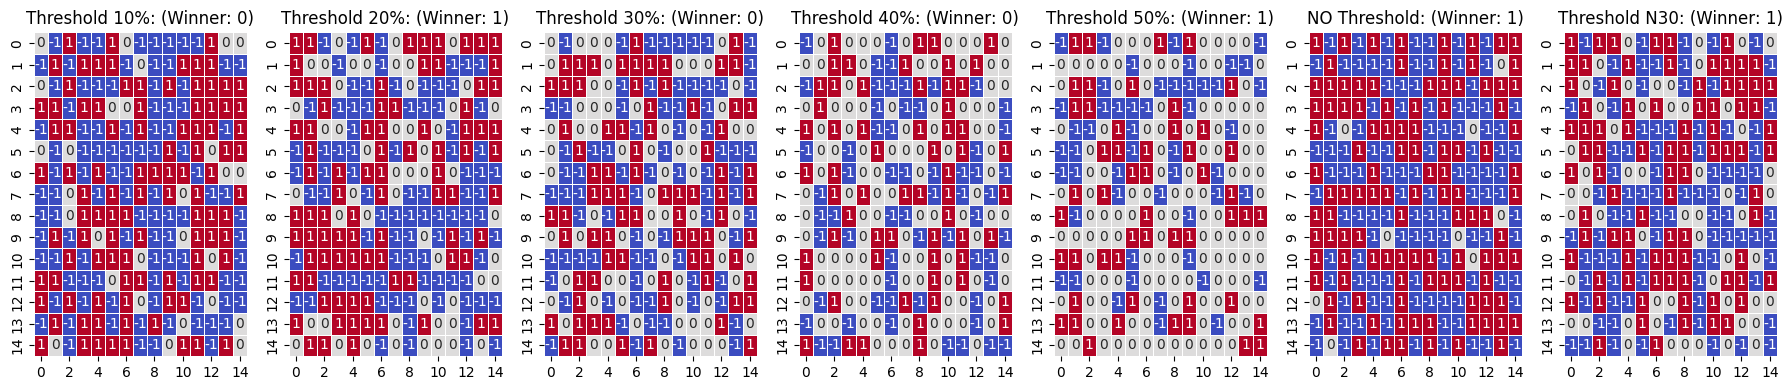

In [14]:
plot_random_game_boards(datasets)

In [17]:
similarities = compare_with_last_dataset(datasets)

ValueError: Found input variables with inconsistent numbers of samples: [452000, 152829788]

In [ ]:
def calculate_ssim(df1, df2):
    """Calculates the SSIM between two datasets representing game boards."""
    ssim_value, _ = ssim(df1.values, df2.values, full=True)
    return ssim_value

# Compare middle datasets to the last dataset (Threshold N30)
def compare_ssim_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    ssim_scores = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            ssim_value = calculate_ssim(df, last_df)
            ssim_scores[label] = ssim_value
            print(f"SSIM between {label} and {last_label}: {ssim_value:.4f}")
    
    return ssim_scores

# Call the function to compare using SSIM
ssim_scores = compare_ssim_with_last_dataset(datasets)


SSIM between NO Threshold and Threshold N30: 1.0000
SSIM between Threshold 10% and Threshold N30: 1.0000
SSIM between Threshold 20% and Threshold N30: 1.0000
SSIM between Threshold 30% and Threshold N30: 1.0000
SSIM between Threshold 40% and Threshold N30: 1.0000
SSIM between Threshold 50% and Threshold N30: 1.0000


/tmp/ipykernel_238657/2487267110.py:3: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(df1.values, df2.values, full=True)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(df1, df2):
    """Calculates the cosine similarity between two datasets."""
    vector1 = df1.values.flatten().reshape(1, -1)
    vector2 = df2.values.flatten().reshape(1, -1)
    cos_sim = cosine_similarity(vector1, vector2)[0][0]
    return cos_sim

# Compare middle datasets to the last dataset (Threshold N30)
def compare_cosine_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    cosine_scores = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            cos_sim = calculate_cosine_similarity(df, last_df)
            cosine_scores[label] = cos_sim
            print(f"Cosine Similarity between {label} and {last_label}: {cos_sim:.4f}")
    
    return cosine_scores

# Call the function to compare using Cosine Similarity
cosine_scores = compare_cosine_with_last_dataset(datasets)

Cosine Similarity between NO Threshold and Threshold N30: 0.0046
Cosine Similarity between Threshold 10% and Threshold N30: -0.0073
Cosine Similarity between Threshold 20% and Threshold N30: 0.0048
Cosine Similarity between Threshold 30% and Threshold N30: -0.0067
Cosine Similarity between Threshold 40% and Threshold N30: 0.0145
Cosine Similarity between Threshold 50% and Threshold N30: 0.0033


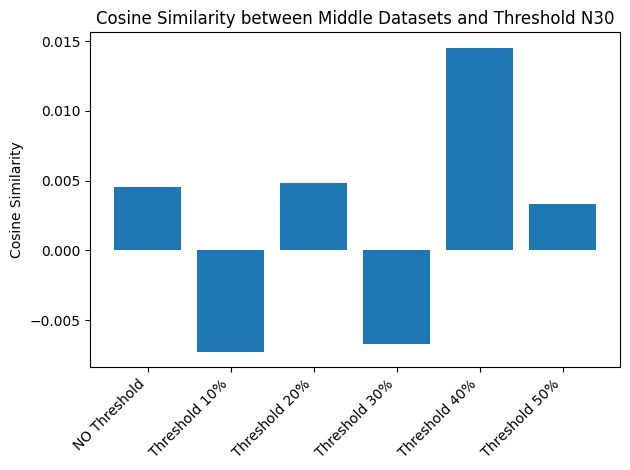

In [ ]:
import matplotlib.pyplot as plt

# Example: Visualize Cosine Similarity results
def plot_similarity(similarity_scores, method='Cosine Similarity'):
    labels = list(similarity_scores.keys())
    values = list(similarity_scores.values())
    
    plt.bar(labels, values)
    plt.title(f'{method} between Middle Datasets and Threshold N30')
    plt.ylabel(method)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the cosine similarity scores
plot_similarity(cosine_scores, method='Cosine Similarity')